# Random Forest Regression
# -GEORGE JEFF ONYANGO
A random forest is an ensemble learning method that combines the predictions from multiple decision trees to produce a more accurate and stable prediction. It is a type of supervised learning algorithm that can be used for both classification and regression tasks. In regression task we can use Random Forest Regression technique for predicting numerical values. It predicts continuous values by averaging the results of multiple decision trees.

Random Forest Regression works by creating multiple of decision trees each trained on a random subset of the data. 
the process begins with Bootstrap sampling where random rows of data are selected with replacement to form different training datasets for each tree. After this we do feature sampling where only a random subset of features is used to build each tree ensuring diversity in the models.

After the trees are trained each tree make a prediction and the final prediction for regression tasks is the average of all the individual tree predictions and this process is called as Aggregation.




In [11]:
'''import dataset'''
import pandas as pd
df = pd.read_csv(r"C:\Users\gojef\Downloads\Position_Salaries.csv")
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 372.0+ bytes


In [15]:
'''extract the features from the DataFrame and stores them in a variable named X then extract the target variable from the DataFrame and stores it in a variable named y.'''
X = df.iloc[:,1:2].values
y = df.iloc[:,2].values

In [19]:
'''create the regressor model'''
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
x_categorical = df.select_dtypes(include=['object']).apply(label_encoder.fit_transform)
x_numerical = df.select_dtypes(exclude=['object']).values
x = pd.concat([pd.DataFrame(x_numerical), x_categorical], axis=1).values

regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)

regressor.fit(x, y)

RandomForestRegressor(n_estimators=10, oob_score=True, random_state=0)

In [21]:
'''Making predictions'''
from sklearn.metrics import mean_squared_error, r2_score

oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

predictions = regressor.predict(x)

mse = mean_squared_error(y, predictions)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y, predictions)
print(f'R-squared: {r2}')

Out-of-Bag Score: 0.644879832593859
Mean Squared Error: 2647325000.0
R-squared: 0.9671801245316117


The code evaluates the trained Random Forest Regression model:

- oob_score_: Retrive out-of-bag (OOB) score which estimates the model's generalization performance.
- Makes predictions using the trained model and stores them in the 'predictions' array.
- Evaluates the model's performance using the Mean Squared Error (MSE) and R-squared (R2) metrics.

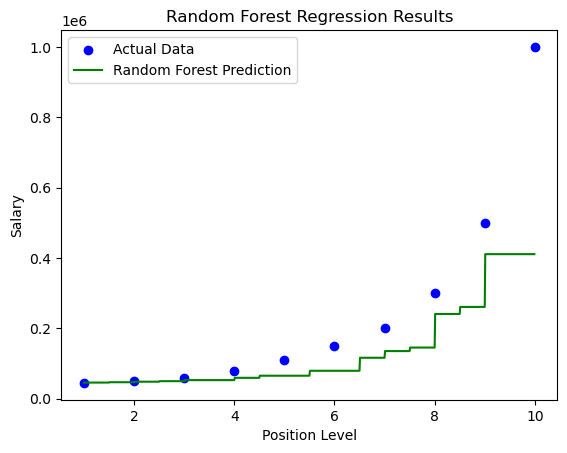

In [24]:
'''Visualization'''
import numpy as np
import matplotlib.pyplot as plt
   
X_grid = np.arange(min(X[:, 0]), max(X[:, 0]), 0.01)  # Only the first feature
X_grid = X_grid.reshape(-1, 1)
X_grid = np.hstack((X_grid, np.zeros((X_grid.shape[0], 2))))  # Pad with zeros

plt.scatter(X[:, 0], y, color='blue', label="Actual Data")
plt.plot(X_grid[:, 0], regressor.predict(X_grid), color='green', label="Random Forest Prediction")  
plt.title("Random Forest Regression Results")
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend()
plt.show()

Now let's visualize the results obtained by using the RandomForest Regression model on our salaries dataset.

- Creates a grid of prediction points covering the range of the feature values.
- Plots the real data points as blue scatter points.
- Plots the predicted values for the prediction grid as a green line.
- Adds labels and a title to the plot for better understanding.

# Visualizing a Single Decision Tree from the Random Forest Model

The code visualizes one of the decision trees from the trained Random Forest model. Plots the selected decision tree, displaying the decision-making process of a single tree within the ensemble.




